In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [146]:
df = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')

In [147]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [148]:
df.shape

(45466, 24)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [150]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [151]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [152]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [153]:
df.duplicated().sum()

13

In [154]:
df = df.drop_duplicates()

In [155]:
df = df.drop(['imdb_id'], axis=1)

In [156]:
df = df.drop('original_title', axis=1)

In [157]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# imputer = IterativeImputer()

# # Fit and transform the imputer on your data
# df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# # Check for missing values
# print(df.isnull().sum())


In [158]:
# for column in df.columns:
#     if df[column].dtype == 'object':
#         df[column].fillna(df[column].mode()[0], inplace=True)

# df.isnull().sum()

In [159]:
# df[df['revenue'] == 0].shape

In [160]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [161]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
# df[df['budget'].isnull()].shape

In [162]:
df['return'] = df['revenue'] / df['budget']
# df[df['return'].isnull()].shape

In [163]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [164]:
df['adult'].value_counts()

False                                                                                                                             45441
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [165]:
df = df.drop('adult', axis=1)

# EDA

In [166]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [167]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

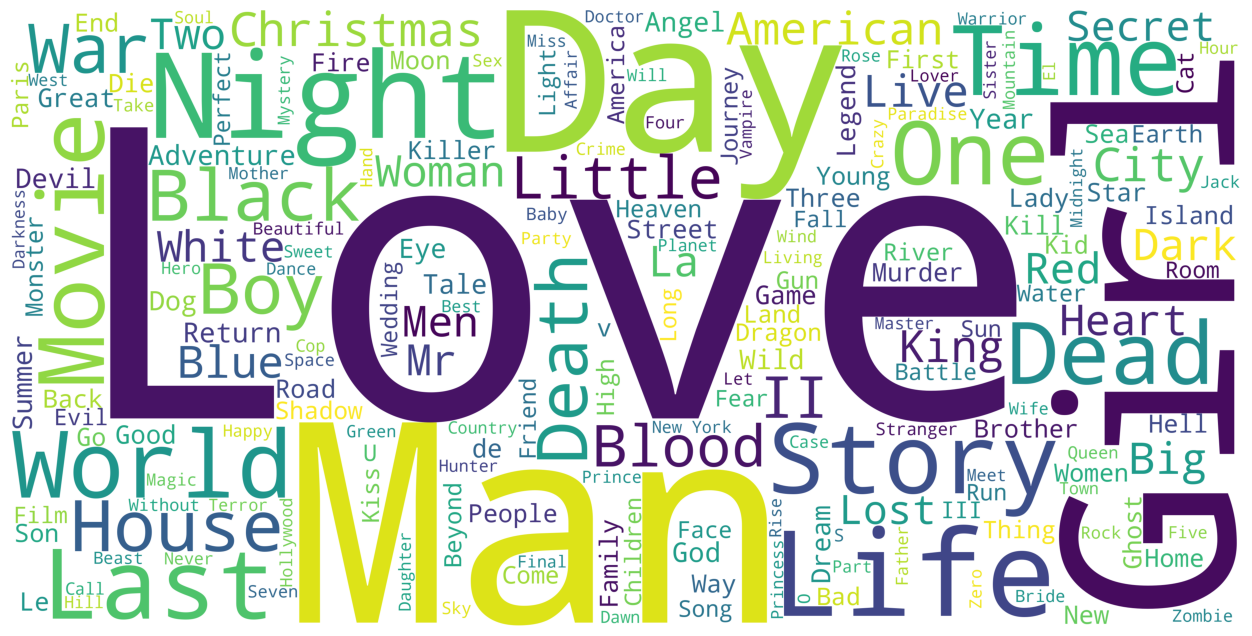

In [168]:

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

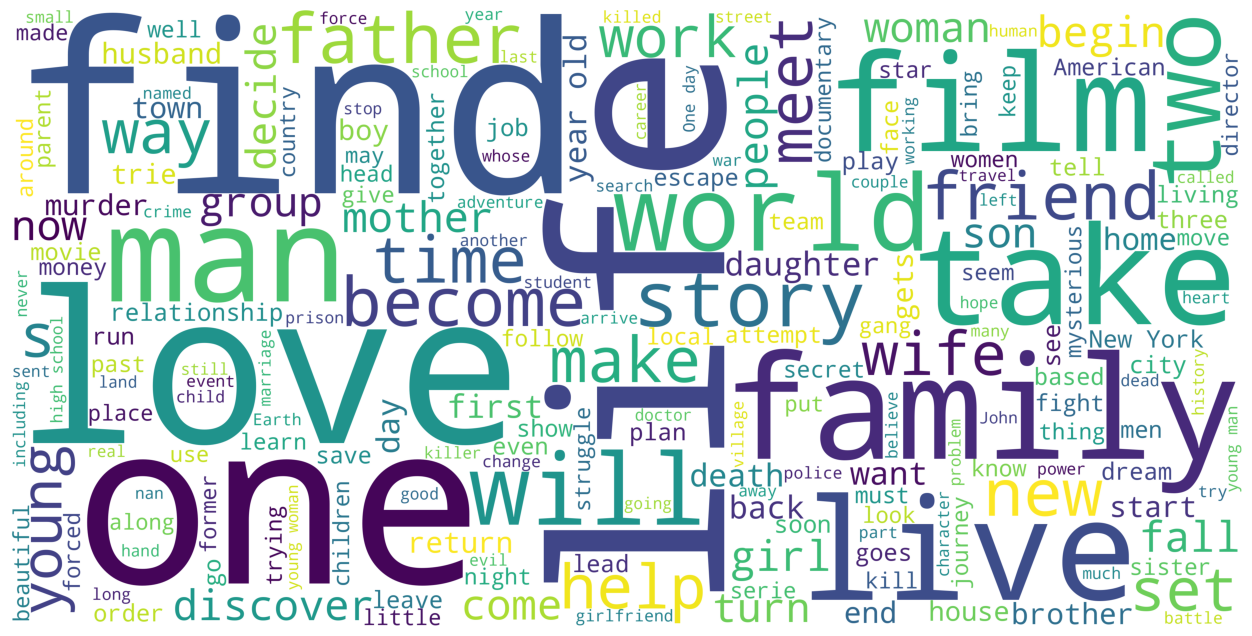

In [169]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [170]:
first_row_countries = df['production_countries'][0]
print(first_row_countries)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [171]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [172]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [173]:
# stack example

#    movie_id                     production_countries
# 0         1  [{'iso_3166_1': 'US', 'name': 'United States'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]
# 1         2  [{'iso_3166_1': 'UK', 'name': 'United Kingdom'}, {'iso_3166_1': 'FR', 'name': 'France'}]
# 2         3                        [{'iso_3166_1': 'JP', 'name': 'Japan'}]

# s = df.apply(lambda x: pd.Series(x['production_countries']), axis=1).stack()


# 0  0    {'iso_3166_1': 'US', 'name': 'United States'}
#    1             {'iso_3166_1': 'CA', 'name': 'Canada'}
# 1  0    {'iso_3166_1': 'UK', 'name': 'United Kingdom'}
#    1              {'iso_3166_1': 'FR', 'name': 'France'}
# 2  0                  {'iso_3166_1': 'JP', 'name': 'Japan'}
# dtype: object

# reset_index(level=1, drop=True)

# 0    {'iso_3166_1': 'US', 'name': 'United States'}
# 1               {'iso_3166_1': 'CA', 'name': 'Canada'}
# 1       {'iso_3166_1': 'UK', 'name': 'United Kingdom'}
# 1                {'iso_3166_1': 'FR', 'name': 'France'}
# 2                   {'iso_3166_1': 'JP', 'name': 'Japan'}
# dtype: object


In [174]:
first_row_countries = df['production_countries'][0]
print(first_row_countries)

['United States of America']


In [175]:
s[0:20]

0     United States of America
1     United States of America
2     United States of America
3     United States of America
4     United States of America
5     United States of America
6                      Germany
6     United States of America
7     United States of America
8     United States of America
9               United Kingdom
9     United States of America
10    United States of America
11                      France
11    United States of America
12    United States of America
13    United States of America
14                      France
14                     Germany
14                       Italy
Name: countries, dtype: object

In [176]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
print(con_df.head())
con_df['country'] = con_df.index
print(con_df.head())
con_df.columns = ['num_movies', 'country']
print(con_df.head())
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

                          countries
United States of America      21150
United Kingdom                 4091
France                         3936
Germany                        2250
Italy                          2168
                          countries                   country
United States of America      21150  United States of America
United Kingdom                 4091            United Kingdom
France                         3936                    France
Germany                        2250                   Germany
Italy                          2168                     Italy
                          num_movies                   country
United States of America       21150  United States of America
United Kingdom                  4091            United Kingdom
France                          3936                    France
Germany                         2250                   Germany
Italy                           2168                     Italy


,num_movies,country
0,21150,United States of America
1,4091,United Kingdom
2,3936,France
3,2250,Germany
4,2168,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,827,India


In [177]:
con_df = con_df[con_df['country'] != 'United States of America']

In [178]:
# data = [ dict(
#         type = 'choropleth',
#         locations = con_df['country'],
#         locationmode = 'country names',
#         z = con_df['num_movies'],
#         text = con_df['country'],
#         colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
#         autocolorscale = False,
#         reversescale = False,
#         marker = dict(
#             line = dict (
#                 color = 'rgb(180,180,180)',
#                 width = 0.5
#             ) ),
#         colorbar = dict(
#             autotick = False,
#             tickprefix = '',
#             title = 'Production Countries'),
#       ) ]

# layout = dict(
#     title = 'Production Countries for the MovieLens Movies (Apart from US)',
#     geo = dict(
#         showframe = False,
#         showcoastlines = False,
#         projection = dict(
#             type = 'Mercator'
#         )
#     )
# )

# fig = dict( data=data, layout=layout )
# py.iplot( fig, validate=False, filename='d3-world-map' )

In [179]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
# df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection']

0                  Toy Story Collection
2             Grumpy Old Men Collection
4        Father of the Bride Collection
9                 James Bond Collection
12                     Balto Collection
                      ...              
45355           The Carry On Collection
45358           The Carry On Collection
45369           The Carry On Collection
45371    DC Super Hero Girls Collection
45382              Red Lotus Collection
Name: belongs_to_collection, Length: 4491, dtype: object

In [180]:
df_fran

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,Toy Story Collection,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
2,Grumpy Old Men Collection,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
4,Father of the Bride Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995
9,James Bond Collection,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,en,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...",...,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,6.072311,1995
12,Balto Collection,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,en,An outcast half-wolf risks his life to prevent...,12.140733,/gV5PCAVCPNxlOLFM1bKk50EqLXO.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,The Carry On Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,24568,en,Bertram Oliphant West (also known as Bo West) ...,1.114848,/8nifhAeOQoTJReWuJTTnsUn2pBa.jpg,"[{'name': 'The Rank Organisation', 'id': 364},...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Carry On Follow That Camel,False,6.1,19.0,NaN,1967
45358,The Carry On Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,19307,en,Sid and Bernie keep having their amorous inten...,4.103723,/dyas4yIxnhGarAhkuD7gsRCR7eQ.jpg,"[{'name': 'The Rank Organisation', 'id': 364}]",...,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fun and games in the great outdoors!,Carry On Camping,False,6.5,25.0,NaN,1969
45369,The Carry On Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,21251,en,Captain S. Melly takes over as the new Command...,0.846154,/xd9qImTfWqQ1WzVtvo4CnLmH5IQ.jpg,"[{'name': 'The Rank Organisation', 'id': 364}]",...,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Carry On England,False,4.8,15.0,NaN,1976
45371,DC Super Hero Girls Collection,NaN,"[{'id': 16, 'name': 'Animation'}]",NaN,460135,en,"When Supergirl, Wonder Woman, Batgirl, Bumbleb...",8.413734,/niLX2txdI5GlVowJlnb5Hr26QpK.jpg,"[{'name': 'Warner Bros. Animation', 'id': 2785}]",...,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,LEGO DC Super Hero Girls: Brain Drain,False,10.0,2.0,NaN,2017


In [181]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [182]:
fran_pivot

,belongs_to_collection,count,mean,sum
0,... Has Fallen Collection,2,183390043.5,366780087.0
1,00 Schneider Filmreihe,0,NaN,0.0
2,08/15 Collection,0,NaN,0.0
3,100 Girls Collection,0,NaN,0.0
4,101 Dalmatians (Animated) Collection,1,215880014.0,215880014.0
...,...,...,...,...
1690,Сказки Чуковского,0,NaN,0.0
1691,Чебурашка и крокодил Гена,0,NaN,0.0
1692,Что Творят мужчины! (Коллекция),0,NaN,0.0
1693,男はつらいよ シリーズ,0,NaN,0.0


In [183]:
# fran_pivot.sort_values('sum', ascending=False).head(10)
fran_pivot.sort_values('sum', ascending=False)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
...,...,...,...,...
743,Les Mystères de l'ouest (Collection),0,NaN,0.000000e+00
742,Les Charlots - Saga,0,NaN,0.000000e+00
741,Les Boys,0,NaN,0.000000e+00
739,Leningrad Cowboys Collection,0,NaN,0.000000e+00


In [184]:
# fran_pivot.sort_values('mean', ascending=False).head(10)
fran_pivot.sort_values('mean', ascending=False)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
...,...,...,...,...
1690,Сказки Чуковского,0,NaN,0.000000e+00
1691,Чебурашка и крокодил Гена,0,NaN,0.000000e+00
1692,Что Творят мужчины! (Коллекция),0,NaN,0.000000e+00
1693,男はつらいよ シリーズ,0,NaN,0.000000e+00


In [185]:
# fran_pivot.sort_values('count', ascending=False).head(10)
fran_pivot.sort_values('count', ascending=False)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
...,...,...,...,...
743,Les Mystères de l'ouest (Collection),0,NaN,0.000000e+00
742,Les Charlots - Saga,0,NaN,0.000000e+00
741,Les Boys,0,NaN,0.000000e+00
739,Leningrad Cowboys Collection,0,NaN,0.000000e+00


In [186]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [187]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [188]:
s

0              Pixar Animation Studios
1                     TriStar Pictures
1                         Teitler Film
1            Interscope Communications
2                         Warner Bros.
                     ...              
45460      20th Century Fox Television
45460    CanWest Global Communications
45462                      Sine Olivia
45463          American World Pictures
45464                        Yermoliev
Name: companies, Length: 70506, dtype: object

In [189]:
com_df = df.drop('production_companies', axis=1).join(s)

In [190]:
com_df

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_countries,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,companies
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Pixar Animation Studios
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,TriStar Pictures
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Teitler Film
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Interscope Communications
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Warner Bros.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,fa,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[Iran],...,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN,NaT,NaN
45462,NaN,NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tl,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,[Philippines],...,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN,2011,Sine Olivia
45463,NaN,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,NaN,2003,American World Pictures
45464,NaN,NaN,[],NaN,227506,en,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,[Russia],...,[],Released,NaN,Satan Triumphant,False,0.0,0.0,NaN,1917,Yermoliev


In [191]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
print(com_sum)
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
print(com_mean)

com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']
print(com_count)


com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)
com_pivot

                                               Total
companies                                           
Warner Bros.                            6.352519e+10
Universal Pictures                      5.525919e+10
Paramount Pictures                      4.880819e+10
Twentieth Century Fox Film Corporation  4.768775e+10
Walt Disney Pictures                    4.083727e+10
...                                              ...
Gädda Five                              0.000000e+00
Gávea Filmes                            0.000000e+00
Gynormous Pictures                      0.000000e+00
GyaO                                    0.000000e+00
프로덕션M                                   0.000000e+00

[23537 rows x 1 columns]
                                                  Average
companies                                                
Colorado Office of Film, Television & Media  1.506249e+09
Abu Dhabi Film Commission                    1.506249e+09
Vita-Ray Dutch Productions (III)             1.153304

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
...,...,...,...
Gädda Five,0.000000e+00,NaN,0
Gávea Filmes,0.000000e+00,NaN,0
Gynormous Pictures,0.000000e+00,NaN,0


In [192]:
# com_pivot.sort_values('Total', ascending=False).head(10)
com_pivot.sort_values('Total', ascending=False)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
...,...,...,...
Republic Entertainment International,0.000000e+00,NaN,0
Republic Pictures International,0.000000e+00,NaN,0
Republic of EPIC,0.000000e+00,NaN,0


In [193]:
# com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False)

,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
...,...,...,...
A24,2.577162e+08,7.809583e+06,33
Centre National de la Cinématographie (CNC),2.072581e+08,7.402076e+06,28
Fine Line Features,1.312556e+08,7.291975e+06,18


In [194]:
# df['original_language'].drop_duplicates().shape[0]
df['original_language'].drop_duplicates()

0          en
28         fr
29         zh
52         it
79         fa
         ... 
35587    82.0
37409      hy
37626      iu
42159      lb
42468      si
Name: original_language, Length: 93, dtype: object

In [195]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
print(lang_df.head())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

    original_language
en              32262
fr               2437
it               1529
ja               1350
de               1079


,number,language
en,32262,en
fr,2437,fr
it,1529,it
ja,1350,ja
de,1079,de


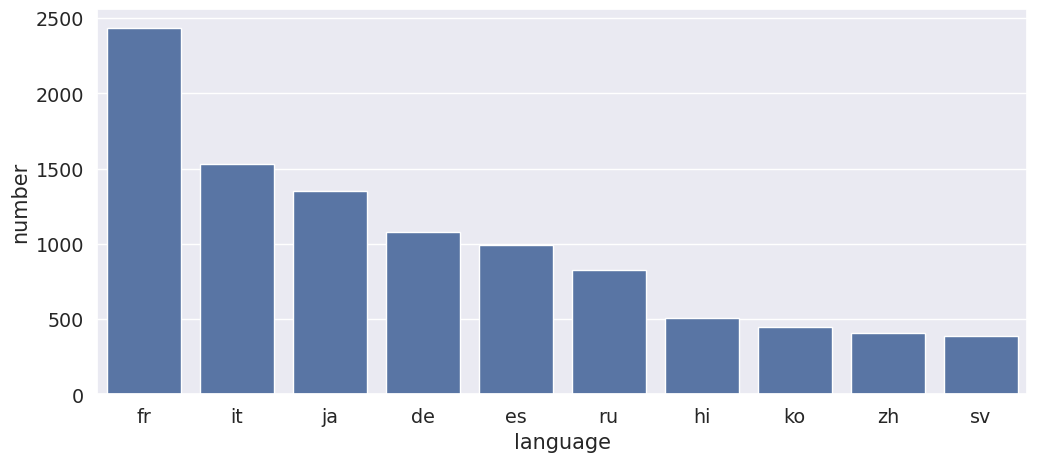

In [196]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [197]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [198]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [199]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [200]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [201]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
# df['vote_average'].describe()

In [202]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


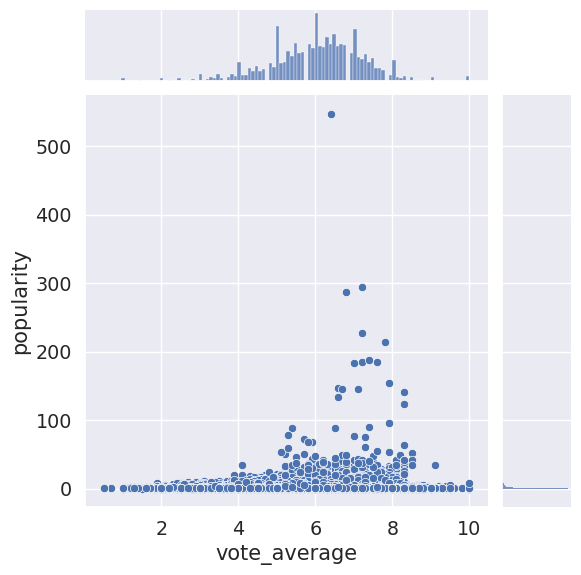

In [203]:
sns.jointplot(x='vote_average', y='popularity', data=df)

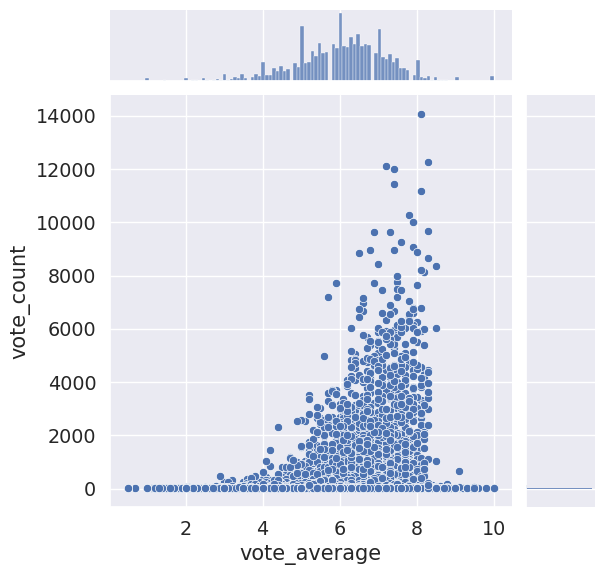

In [204]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

In [205]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [206]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [207]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [208]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

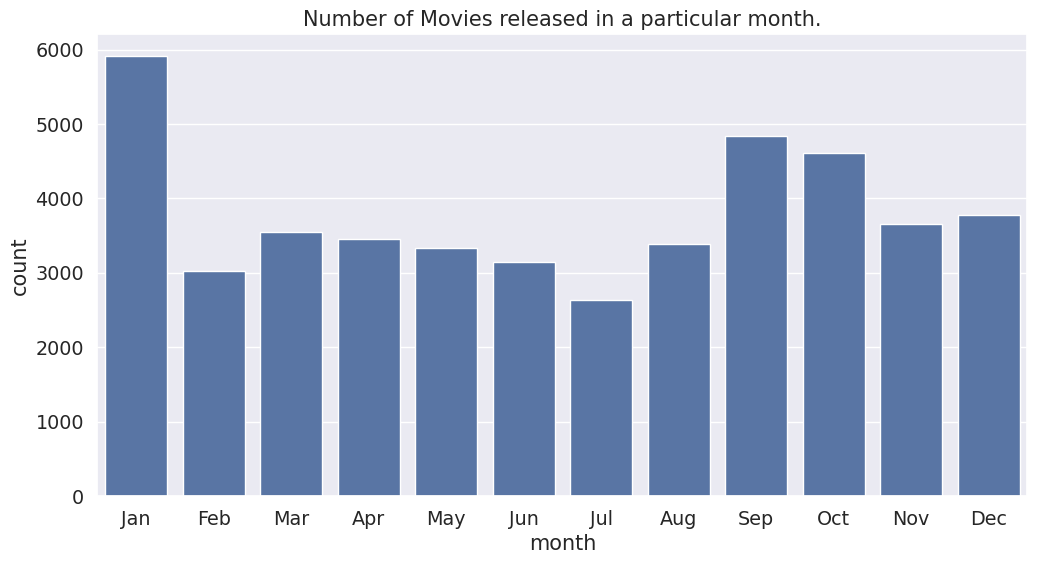

In [209]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<Axes: title={'center': 'Average Gross by the Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

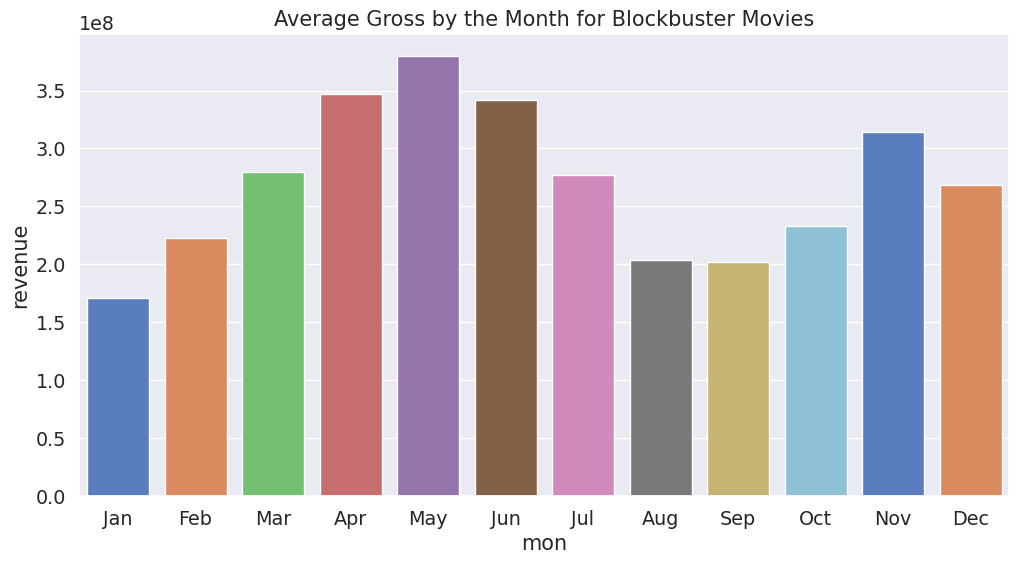

In [210]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, palette="muted", order=month_order)

(0.0, 12.0)

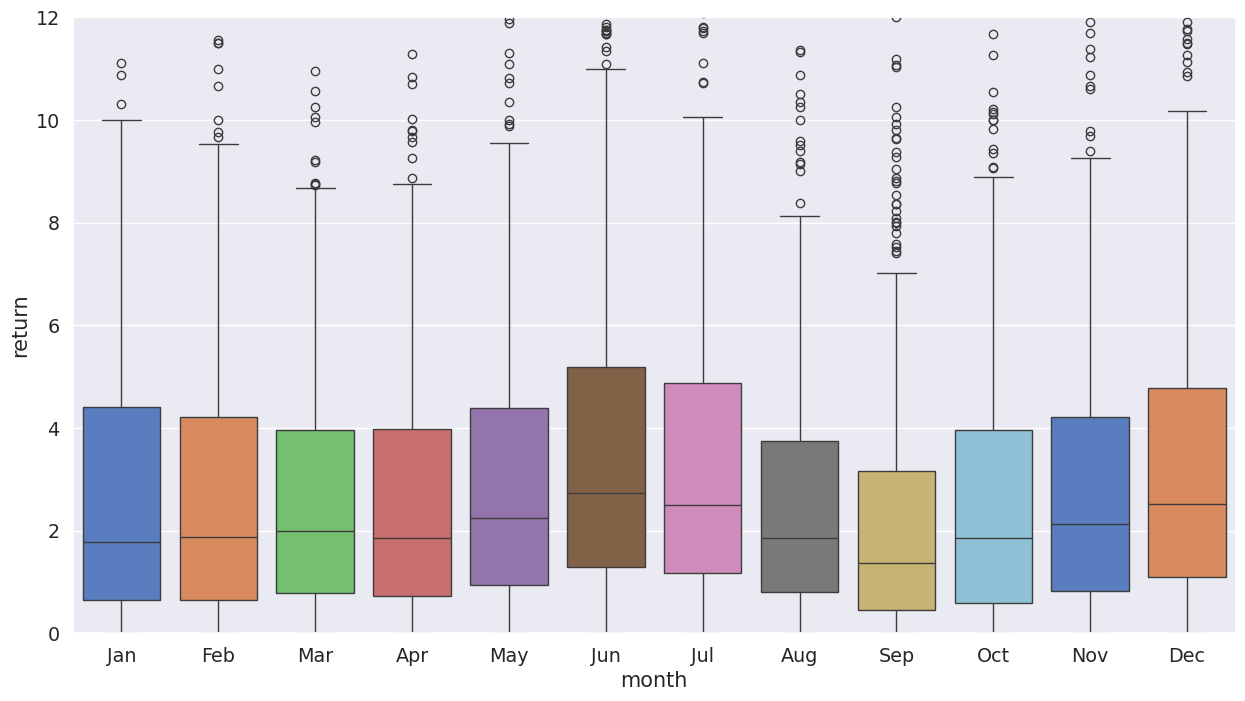

In [211]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

<Axes: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

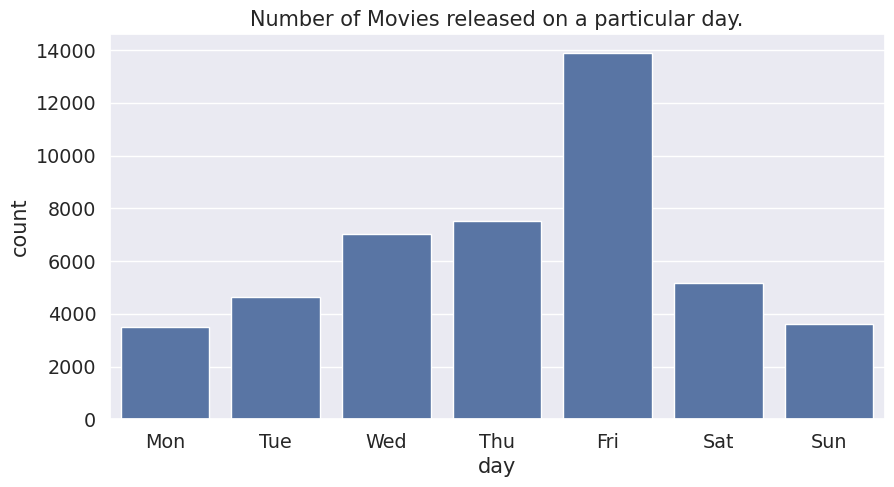

In [212]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

<Axes: xlabel='year'>

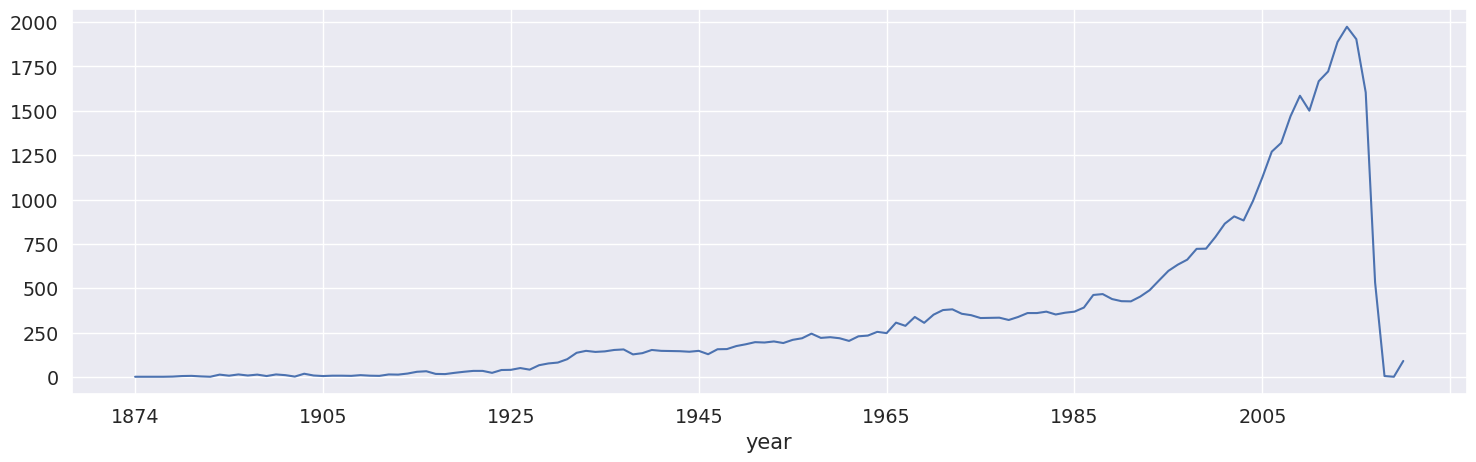

In [213]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [214]:
df[df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34938,Traffic Crossing Leeds Bridge,1888
34934,Accordion Player,1888
34935,"Monkeyshines, No. 1",1890
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
39954,"Monkeyshines, No. 3",1890


In [215]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [216]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)


<Axes: xlabel='year', ylabel='month'>

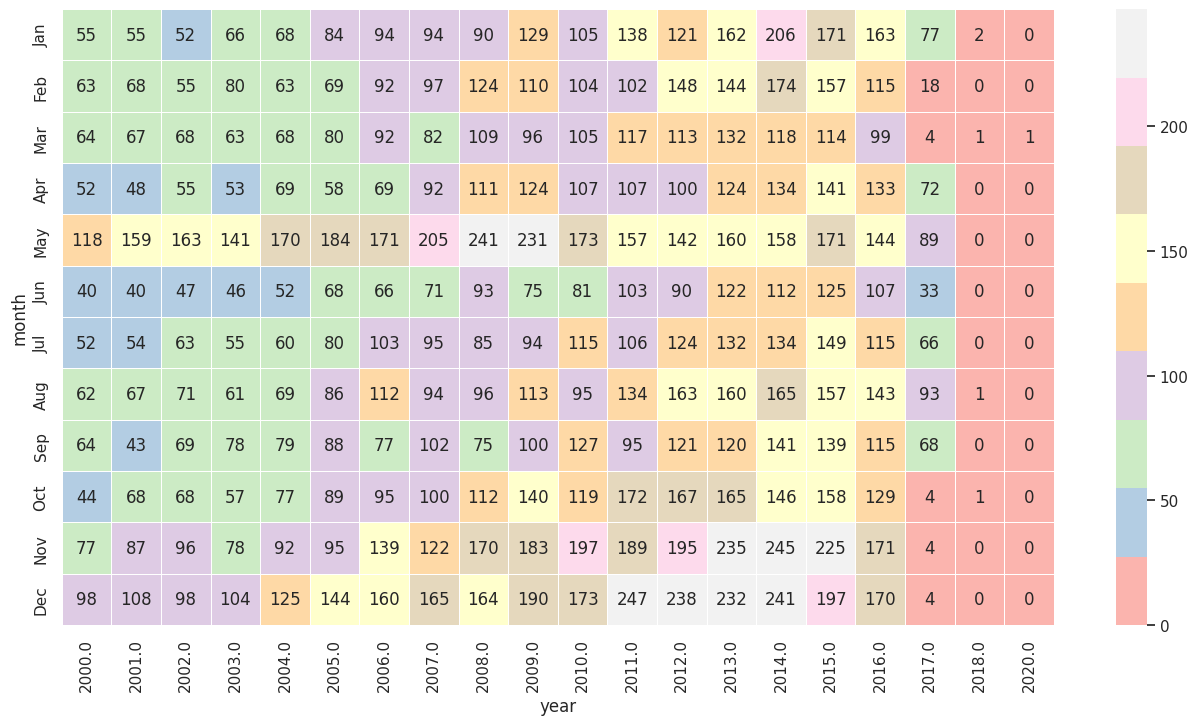

In [217]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order,cmap='Pastel1')


In [218]:
sns.set(font_scale=1.25)

In [219]:
df['status'].value_counts()

Released           45002
Rumored              229
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [220]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [221]:
df['spoken_languages'].value_counts()

1     33726
2      5370
0      3833
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
10        1
12        1
19        1
13        1
Name: spoken_languages, dtype: int64

In [222]:
df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


In [223]:
df['runtime'] = df['runtime'].astype('float')

In [224]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
36864,1.0,Severed Footage,2013
41876,1.0,Annie Oakley,1894
41877,1.0,The Sick Kitten,1903
41878,1.0,A Morning Bath,1896
34940,1.0,Passage of Venus,1874
18914,1.0,"Ella Lola, a la Trilby",1898
41879,1.0,Panorama of Esplanade by Night,1901
41880,1.0,Black Diamond Express,1896
41308,1.0,Tetra Vaal,2004
34945,1.0,Newark Athlete,1891


In [225]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
19965,1140.0,Jazz,2001
40938,1140.0,Baseball,1994
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


In [226]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
25390,The Hobbit: The Battle of the Five Armies,250000000.0,9.560198e+08,3.824079,2014


In [227]:
pd.set_option('display.max_colwidth', 50)

In [228]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


In [229]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


In [230]:
df['year'] = df['year'].replace('NaT', np.nan)

In [231]:
df['year'] = df['year'].apply(clean_numeric)

In [232]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [233]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [234]:
gen_df = df.drop('genres', axis=1).join(s)

In [235]:
gen_df['genre'].value_counts().shape[0]

32

In [236]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20255
1,Comedy,13180
2,Thriller,7621
3,Romance,6734
4,Action,6594
5,Horror,4672
6,Crime,4306
7,Documentary,3932
8,Adventure,3495
9,Science Fiction,3046


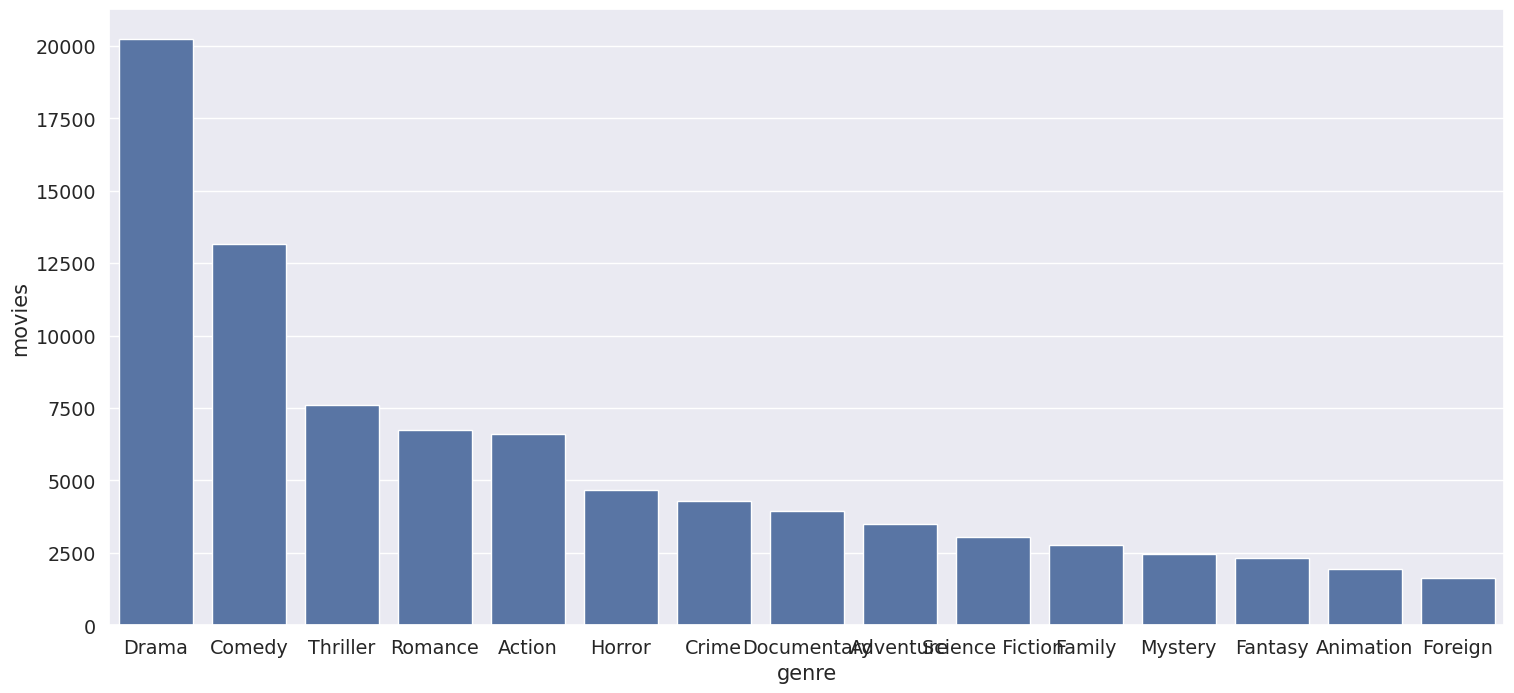

In [237]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45453 entries, 0 to 45465
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4494 non-null   object 
 1   budget                 8889 non-null   float64
 2   genres                 45453 non-null  object 
 3   homepage               7780 non-null   object 
 4   id                     45453 non-null  object 
 5   original_language      45442 non-null  object 
 6   overview               45453 non-null  object 
 7   popularity             45447 non-null  float64
 8   poster_path            45067 non-null  object 
 9   production_companies   45453 non-null  object 
 10  production_countries   45453 non-null  object 
 11  release_date           45366 non-null  object 
 12  revenue                7406 non-null   float64
 13  runtime                45190 non-null  float64
 14  spoken_languages       45453 non-null  int64  
 15  st

In [239]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select relevant columns for the pair plot
# columns_for_pairplot = ['budget', 'popularity', 'revenue', 'revenue', 'vote_count', 'vote_average', 'return']


# # Subset the DataFrame with selected columns
# df_subset = df[columns_for_pairplot]


# # Create a pair plot
# sns.pairplot(df_subset)

# # Show the plot
# plt.show()


In [240]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

In [241]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

In [242]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [243]:
df['id'] = df['id'].apply(convert_int)

In [244]:
# df = df.drop([19730, 29503, 35587])

In [245]:
# df['id'] = df['id'].astype('int')

In [246]:
rgf = df[df['return'].notnull()]
# # rgf.shape

In [247]:
rgf = rgf.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'return'], axis=1)

In [248]:
s = rgf.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_rgf = rgf.drop('genres', axis=1).join(s)
genres_train = gen_rgf['genre'].drop_duplicates()

**Classification**


In [249]:
cls = df[df['return'].notnull()]
# cls.shape

In [250]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Select relevant columns for correlation analysis
# selected_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'year', 'cast_size', 'crew_size']

# # Create a correlation matrix
# correlation_matrix = df[selected_columns].corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(12, 8))

# # Create a heatmap of the correlation matrix
# sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f", linewidths=0.5)

# # Show the plot
# plt.title("Correlation Plot")
# plt.show()


In [251]:
cls = cls.drop(['overview', 'release_date', 'status', 'tagline', 'revenue'], axis=1)

In [252]:
cls['return'] = cls['return'].apply(lambda x: 1 if x >=1 else 0)

In [253]:
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)

In [254]:
s = cls.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_cls = cls.drop('genres', axis=1).join(s)

In [255]:
df.dtypes

belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
id                       float64
original_language         object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages           int64
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
return                   float64
year                     float64
day                       object
month                     object
dtype: object

In [256]:
def classification_engineering(df):
    for genre in genres_train:
        # df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if (isinstance(x, list) and genre in x) else 0)

    # df['genres'] = df['genres'].apply(lambda x: len(x))
    df['genres'] = df['genres'].apply(lambda x: len(x) if isinstance(x, list) else x)
    df = df.drop('homepage', axis=1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [257]:
cls = classification_engineering(cls)

In [258]:
cls.isnull().sum()

belongs_to_collection    0
budget                   0
genres                   0
id                       0
popularity               0
poster_path              0
production_companies     0
production_countries     0
runtime                  0
spoken_languages         0
video                    0
vote_average             0
vote_count               0
return                   0
year                     0
is_Animation             0
is_Comedy                0
is_Family                0
is_Adventure             0
is_Fantasy               0
is_Drama                 0
is_Romance               0
is_Action                0
is_Crime                 0
is_Thriller              0
is_History               0
is_Science Fiction       0
is_Mystery               0
is_Horror                0
is_War                   0
is_Foreign               0
is_Documentary           0
is_Western               0
is_Music                 0
is_nan                   0
is_TV Movie              0
is_english               0
i

In [259]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame
# height_value = 5
# sns.pairplot(cls, height=height_value)
# plt.show()


In [260]:
X, y = cls.drop('return', axis=1), cls['return']

In [261]:
unique_values_counts = cls['return'].value_counts()

print("Unique values counts in 'RainTomorrow' column:")
print(unique_values_counts)

Unique values counts in 'RainTomorrow' column:
1    3776
0    1605
Name: return, dtype: int64


In [262]:
X = X.drop(['poster_path','video'],axis=1)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)


In [264]:
X_train.dtypes

belongs_to_collection      int64
budget                   float64
genres                     int64
id                       float64
popularity               float64
production_companies       int64
production_countries       int64
runtime                  float64
spoken_languages           int64
vote_average             float64
vote_count               float64
year                     float64
is_Animation               int64
is_Comedy                  int64
is_Family                  int64
is_Adventure               int64
is_Fantasy                 int64
is_Drama                   int64
is_Romance                 int64
is_Action                  int64
is_Crime                   int64
is_Thriller                int64
is_History                 int64
is_Science Fiction         int64
is_Mystery                 int64
is_Horror                  int64
is_War                     int64
is_Foreign                 int64
is_Documentary             int64
is_Western                 int64
is_Music  

In [265]:
X_train.isnull().sum()

belongs_to_collection    0
budget                   0
genres                   0
id                       0
popularity               0
production_companies     0
production_countries     0
runtime                  0
spoken_languages         0
vote_average             0
vote_count               0
year                     0
is_Animation             0
is_Comedy                0
is_Family                0
is_Adventure             0
is_Fantasy               0
is_Drama                 0
is_Romance               0
is_Action                0
is_Crime                 0
is_Thriller              0
is_History               0
is_Science Fiction       0
is_Mystery               0
is_Horror                0
is_War                   0
is_Foreign               0
is_Documentary           0
is_Western               0
is_Music                 0
is_nan                   0
is_TV Movie              0
is_english               0
is_Friday                0
is_Holiday               0
dtype: int64

In [266]:
unique_values_counts = cls['return'].value_counts()

print("Unique values counts in 'return' column:")
print(unique_values_counts)


Unique values counts in 'return' column:
1    3776
0    1605
Name: return, dtype: int64


In [267]:
# import numpy as np
# from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Generate a synthetic imbalanced dataset for demonstration
# X, y = make_classification(n_classes=2, class_sep=2, weights=[0.99, 0.01],
#                            n_informative=3, n_redundant=1, flip_y=0,
#                            n_features=20, n_clusters_per_class=1,
#                            n_samples=1000, random_state=42)

# # Split the dataset into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# from sklearn.model_selection import StratifiedKFold

# # Assuming 'X' and 'y' are your features and target variable
# skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# for train_index, test_index in skf.split(X, y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [268]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming y_resampled is a NumPy array
# unique_values, counts = np.unique(y_train, return_counts=True)

# # Plotting a pie chart with different colors for 0 and 1
# colors = ['lightcoral', 'lightskyblue']
# plt.figure(figsize=(6, 6))
# plt.pie(counts, labels=unique_values, autopct='%1.1f%%', startangle=90, colors=colors)
# plt.title('Class Distribution Pie Chart (0: Red, 1: Blue)')
# plt.show()

In [269]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.transform(X_test)

In [270]:
import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV, StratifiedKFold

class XGBoostClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators = []

    def fit(self, X, y):
        # Convert labels to 0 and 1
        y_binary = (y + 1) // 2

        # Initialize XGBoost model
        model = xgb.XGBClassifier(n_estimators=self.n_estimators, learning_rate=self.learning_rate)

        # Fit the model
        model.fit(X, y_binary)

        # Save the model
        self.estimators.append(model)

    def predict(self, X):
        # Use the last trained model for prediction
        model = self.estimators[-1]

        # Convert to binary predictions
        return model.predict(X)

    def accuracy(self, X, y):
        # Make predictions
        y_pred = self.predict(X)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y)
        return accuracy

    def get_params(self, deep=True):
        return {'n_estimators': self.n_estimators, 'learning_rate': self.learning_rate}

    def set_params(self, **params):
        self.n_estimators = params['n_estimators']
        self.learning_rate = params['learning_rate']
        return self

# Assuming you already have train_X, test_X, train_y, test_y
clf = XGBoostClassifier()

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(clf, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Train set accuracy
train_accuracy = best_model.accuracy(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Test set accuracy
test_accuracy = best_model.accuracy(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.9677819083023544
Test Accuracy: 0.7919762258543833


In [ ]:
## custom XGB

import numpy as np

class XGBoostClassifierCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, y_true, y_pred):
        return y_true - self.sigmoid(y_pred)

    def predict(self, X):
        # Make predictions by summing up predictions from all trees
        predictions = np.sum(self.learning_rate * self.predict_tree(tree, X) for tree in self.trees)
        return np.round(self.sigmoid(predictions))

    def predict_tree(self, tree, X):
        if 'value' in tree:
            # If the node is a leaf, return the predicted value
            return tree['value']

        # Recursively traverse the tree to get the prediction
        if X[0, tree['feature_index']] <= tree['threshold']:
            return self.predict_tree(tree['left'], X)
        else:
            return self.predict_tree(tree['right'], X)

    def fit(self, X, y):
        # Initialize predictions with zeros
        predictions = np.zeros(len(y))

        for _ in range(self.n_estimators):
            # Compute the negative gradient (residuals)
            residuals = self.gradient(y, predictions)

            # Fit a weak learner (Decision Tree) to the negative gradient
            tree = self.fit_tree(X, residuals, depth=0)
            self.trees.append(tree)

            # Update predictions using the learning rate
            predictions += self.learning_rate * self.predict_tree(tree, X)


    def fit_tree(self, X, y, depth):
        if depth == self.max_depth or len(set(y)) == 1:
            # If max depth reached or only one class in y, return leaf node
            return np.mean(y)

        # Find the best split
        feature_index, threshold = self.find_best_split(X, y)

        # Split the data
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask

        # Recursively build left and right subtrees
        left_subtree = self.fit_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.fit_tree(X[right_mask], y[right_mask], depth + 1)

        # Return a tree node along with prediction values at leaf nodes
        return {'feature_index': feature_index, 'threshold': threshold,
                'left': left_subtree, 'right': right_subtree, 'value': np.mean(y)}


    def find_best_split(self, X, y):
        m, n = X.shape
        best_gini = float('inf')
        best_feature_index = None
        best_threshold = None

        for feature_index in range(n):
            unique_values = np.unique(X[:, feature_index])
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2

            for threshold in thresholds:
                # Split the data
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                # Calculate Gini impurity
                gini = self.calculate_gini(y[left_mask]) + self.calculate_gini(y[right_mask])

                # Update best split if current split is better
                if gini < best_gini:
                    best_gini = gini
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def calculate_gini(self, y):
        # Calculate Gini impurity
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def accuracy(self, X, y):
        # Make predictions
        y_pred = self.predict(X)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y)
        return accuracy

# Assuming you already have train_X, test_X, train_y, test_y
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

# Create and train the custom XGBoost classifier
clf_custom = XGBoostClassifierCustom()
clf_custom.fit(X_train, y_train)

# Train set accuracy
train_accuracy_custom = clf_custom.accuracy(X_train, y_train)
print(f"Training Accuracy (Custom): {train_accuracy_custom}")

# Test set accuracy
test_accuracy_custom = clf_custom.accuracy(X_test, y_test)
print(f"Test Accuracy (Custom): {test_accuracy_custom}")


In [132]:
import numpy as np
from sklearn.model_selection import train_test_split

class XGBoostClassifierCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, y_true, y_pred):
        return y_true - self.sigmoid(y_pred)

    def predict(self, X):
        # Make predictions by summing up predictions from all trees
        predictions = np.sum(self.learning_rate * self.predict_tree(tree, X) for tree in self.trees)
        return np.round(self.sigmoid(predictions))

    def predict_tree(self, tree, X):
        if 'value' in tree:
            # If the node is a leaf, return the predicted value
            return tree['value']

        # Recursively traverse the tree to get the prediction
        if X[0, tree['feature_index']] <= tree['threshold']:
            return self.predict_tree(tree['left'], X)
        else:
            return self.predict_tree(tree['right'], X)

    def fit(self, X, y, X_val=None, y_val=None):
        # Initialize predictions with zeros
        predictions = np.zeros(len(y))
        previous_val_accuracy = 0  # For early stopping

        for _ in range(self.n_estimators):
            # Compute the negative gradient (residuals)
            residuals = self.gradient(y, predictions)

            # Fit a weak learner (Decision Tree) to the negative gradient
            tree = self.fit_tree(X, residuals, depth=0)
            self.trees.append(tree)

            # Update predictions using the learning rate
            predictions += self.learning_rate * self.predict_tree(tree, X)

            # Calculate accuracy on validation set (for early stopping)
            if X_val is not None and y_val is not None:
                val_accuracy = self.accuracy(X_val, y_val)
                # Implement early stopping based on validation accuracy
                if val_accuracy < previous_val_accuracy:
                    break
                previous_val_accuracy = val_accuracy

    def fit_tree(self, X, y, depth):
        if depth == self.max_depth or len(set(y)) == 1:
            # If max depth reached or only one class in y, return leaf node
            return np.mean(y)

        # Find the best split
        feature_index, threshold = self.find_best_split(X, y)

        # Split the data
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask

        # Recursively build left and right subtrees
        left_subtree = self.fit_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.fit_tree(X[right_mask], y[right_mask], depth + 1)

        # Return a tree node along with prediction values at leaf nodes
        return {'feature_index': feature_index, 'threshold': threshold,
                'left': left_subtree, 'right': right_subtree, 'value': np.mean(y)}

    def find_best_split(self, X, y):
        m, n = X.shape
        best_gini = float('inf')
        best_feature_index = None
        best_threshold = None

        for feature_index in range(n):
            unique_values = np.unique(X[:, feature_index])
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2

            for threshold in thresholds:
                # Split the data
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask

                # Calculate Gini impurity
                gini = self.calculate_gini(y[left_mask]) + self.calculate_gini(y[right_mask])

                # Update best split if current split is better
                if gini < best_gini:
                    best_gini = gini
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def calculate_gini(self, y):
        # Calculate Gini impurity
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def accuracy(self, X, y):
        # Make predictions
        y_pred = self.predict(X)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y)
        return accuracy


# Assuming you already have train_X, test_X, train_y, test_y
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

# Create and train the custom XGBoost classifier
clf_custom = XGBoostClassifierCustom(n_estimators=200, learning_rate=0.05, max_depth=4)
clf_custom.fit(X_train, y_train, X_val=X_test, y_val=y_test)

# Train set accuracy
train_accuracy_custom = clf_custom.accuracy(X_train, y_train)
print(f"Training Accuracy (Custom): {train_accuracy_custom}")

# Test set accuracy
test_accuracy_custom = clf_custom.accuracy(X_test, y_test)
print(f"Test Accuracy (Custom): {test_accuracy_custom}")


InvalidIndexError: (slice(None, None, None), 0)

In [281]:
# #### keep on running custom xgb
# import numpy as np
# from sklearn.base import BaseEstimator, ClassifierMixin
# from sklearn.model_selection import train_test_split, GridSearchCV

# class XGBoostClassifierCustom(BaseEstimator, ClassifierMixin):
#     def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
#         self.n_estimators = n_estimators
#         self.learning_rate = learning_rate
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.trees = []

#     def sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))

#     def gradient(self, y_true, y_pred):
#         return y_true - self.sigmoid(y_pred)

#     def predict(self, X):
#         # Make predictions by summing up predictions from all trees
#         predictions = np.sum(self.learning_rate * self.predict_tree(tree, X) for tree in self.trees)
#         return np.round(self.sigmoid(predictions))

#     def predict_tree(self, tree, X):
#         if 'value' in tree:
#             # If the node is a leaf, return the predicted value
#             return tree['value']

#         # Recursively traverse the tree to get the prediction
#         if X[0, tree['feature_index']] <= tree['threshold']:
#             return self.predict_tree(tree['left'], X)
#         else:
#             return self.predict_tree(tree['right'], X)

#     def fit(self, X, y, X_val=None, y_val=None):
#         # Initialize predictions with zeros
#         predictions = np.zeros(len(y))
#         previous_val_accuracy = 0  # For early stopping

#         for _ in range(self.n_estimators):
#             # Compute the negative gradient (residuals)
#             residuals = self.gradient(y, predictions)

#             # Fit a weak learner (Decision Tree) to the negative gradient
#             tree = self.fit_tree(X, residuals, depth=0)
#             self.trees.append(tree)

#             # Update predictions using the learning rate
#             predictions += self.learning_rate * self.predict_tree(tree, X)

#             # Calculate accuracy on validation set (for early stopping)
#             if X_val is not None and y_val is not None:
#                 val_accuracy = self.accuracy(X_val, y_val)
#                 # Implement early stopping based on validation accuracy
#                 if val_accuracy < previous_val_accuracy:
#                     break
#                 previous_val_accuracy = val_accuracy

#     def fit_tree(self, X, y, depth):
#         if depth == self.max_depth or len(set(y)) == 1 or len(y) < self.min_samples_split:
#             # If max depth reached, only one class in y, or not enough samples, return leaf node
#             return np.mean(y)

#         # Find the best split
#         feature_index, threshold = self.find_best_split(X, y)

#         # Split the data
#         left_mask = X[:, feature_index] <= threshold
#         right_mask = ~left_mask

#         # Recursively build left and right subtrees
#         left_subtree = self.fit_tree(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self.fit_tree(X[right_mask], y[right_mask], depth + 1)

#         # Return a tree node along with prediction values at leaf nodes
#         return {'feature_index': feature_index, 'threshold': threshold,
#                 'left': left_subtree, 'right': right_subtree, 'value': np.mean(y)}

#     def find_best_split(self, X, y):
#         m, n = X.shape
#         best_gini = float('inf')
#         best_feature_index = None
#         best_threshold = None

#         for feature_index in range(n):
#             unique_values = np.unique(X[:, feature_index])
#             thresholds = (unique_values[:-1] + unique_values[1:]) / 2

#             for threshold in thresholds:
#                 # Split the data
#                 left_mask = X[:, feature_index] <= threshold
#                 right_mask = ~left_mask

#                 # Calculate Gini impurity
#                 gini = self.calculate_gini(y[left_mask]) + self.calculate_gini(y[right_mask])

#                 # Update best split if current split is better
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature_index = feature_index
#                     best_threshold = threshold

#         return best_feature_index, best_threshold

#     def calculate_gini(self, y):
#         # Calculate Gini impurity
#         _, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         gini = 1 - np.sum(probabilities**2)
#         return gini

#     def accuracy(self, X, y):
#         # Make predictions
#         y_pred = self.predict(X)

#         # Calculate accuracy
#         accuracy = np.mean(y_pred == y)
#         return accuracy

#     def get_params(self, deep=True):
#         return {'n_estimators': self.n_estimators,
#                 'learning_rate': self.learning_rate,
#                 'max_depth': self.max_depth,
#                 'min_samples_split': self.min_samples_split}

# # Assuming you already have X_train, X_test, y_train, y_test
# # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

# # Hyperparameter tuning using Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10]
# }

# clf_custom = XGBoostClassifierCustom()
# grid_search = GridSearchCV(clf_custom, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Train set accuracy
# train_accuracy_custom = best_model.accuracy(X_train, y_train)
# print(f"Training Accuracy (Custom): {train_accuracy_custom}")

# # Test set accuracy
# test_accuracy_custom = best_model.accuracy(X_test, y_test)
# print(f"Test Accuracy (Custom): {test_accuracy_custom}")


In [282]:
# import numpy as np
# import pandas as pd  # Make sure to import pandas if not already done
# from sklearn.base import BaseEstimator, ClassifierMixin
# from sklearn.model_selection import train_test_split, GridSearchCV

# class XGBoostClassifierCustom(BaseEstimator, ClassifierMixin):
#     def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2):
#         self.n_estimators = n_estimators
#         self.learning_rate = learning_rate
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.trees = []

#     def sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))

#     def gradient(self, y_true, y_pred):
#         return y_true - self.sigmoid(y_pred)

#     def predict(self, X):
#         # Make predictions by summing up predictions from all trees
#         predictions = np.sum(self.learning_rate * self.predict_tree(tree, X) for tree in self.trees)
#         return np.round(self.sigmoid(predictions))

#     def predict_tree(self, tree, X):
#         if 'value' in tree:
#             # If the node is a leaf, return the predicted value
#             return tree['value']

#         # Recursively traverse the tree to get the prediction
#         if X[0, tree['feature_index']] <= tree['threshold']:
#             return self.predict_tree(tree['left'], X)
#         else:
#             return self.predict_tree(tree['right'], X)

#     def fit(self, X, y, X_val=None, y_val=None):
#         # Initialize predictions with zeros
#         predictions = np.zeros(len(y))
#         previous_val_accuracy = 0  # For early stopping

#         for _ in range(self.n_estimators):
#             # Compute the negative gradient (residuals)
#             residuals = self.gradient(y, predictions)

#             # Fit a weak learner (Decision Tree) to the negative gradient
#             tree = self.fit_tree(X, residuals, depth=0)
#             self.trees.append(tree)

#             # Update predictions using the learning rate
#             predictions += self.learning_rate * self.predict_tree(tree, X)

#             # Calculate accuracy on validation set (for early stopping)
#             if X_val is not None and y_val is not None:
#                 val_accuracy = self.accuracy(X_val, y_val)
#                 # Implement early stopping based on validation accuracy
#                 if val_accuracy < previous_val_accuracy:
#                     break
#                 previous_val_accuracy = val_accuracy

#     def fit_tree(self, X, y, depth):
#         if depth == self.max_depth or len(set(y)) == 1 or len(y) < self.min_samples_split:
#             # If max depth reached, only one class in y, or not enough samples, return leaf node
#             return np.mean(y)

#         # Find the best split
#         feature_index, threshold = self.find_best_split(X, y)

#         # Split the data
#         left_mask = X[:, feature_index] <= threshold
#         right_mask = ~left_mask

#         # Recursively build left and right subtrees
#         left_subtree = self.fit_tree(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self.fit_tree(X[right_mask], y[right_mask], depth + 1)

#         # Return a tree node along with prediction values at leaf nodes
#         return {'feature_index': feature_index, 'threshold': threshold,
#                 'left': left_subtree, 'right': right_subtree, 'value': np.mean(y)}

#     def find_best_split(self, X, y):
#         m, n = X.shape
#         best_gini = float('inf')
#         best_feature_index = None
#         best_threshold = None

#         for feature_index in range(n):
#             unique_values = np.unique(X[:, feature_index])
#             thresholds = (unique_values[:-1] + unique_values[1:]) / 2

#             for threshold in thresholds:
#                 # Split the data
#                 left_mask = X[:, feature_index] <= threshold
#                 right_mask = ~left_mask

#                 # Calculate Gini impurity
#                 gini = self.calculate_gini(y[left_mask]) + self.calculate_gini(y[right_mask])

#                 # Update best split if current split is better
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature_index = feature_index
#                     best_threshold = threshold

#         return best_feature_index, best_threshold

#     def calculate_gini(self, y):
#         # Calculate Gini impurity
#         _, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         gini = 1 - np.sum(probabilities**2)
#         return gini

#     def accuracy(self, X, y):
#         # Make predictions
#         y_pred = self.predict(X)

#         # Calculate accuracy
#         accuracy = np.mean(y_pred == y)
#         return accuracy

#     def get_params(self, deep=True):
#         return {'n_estimators': self.n_estimators,
#                 'learning_rate': self.learning_rate,
#                 'max_depth': self.max_depth,
#                 'min_samples_split': self.min_samples_split}

# # Assuming you already have X_train, X_test, y_train, y_test
# # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

# # Hyperparameter tuning using Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10]
# }

# # Convert X_train and X_test to numpy arrays if they are pandas DataFrames
# X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
# X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# clf_custom = XGBoostClassifierCustom()
# grid_search = GridSearchCV(clf_custom, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Train set accuracy
# train_accuracy_custom = best_model.accuracy(X_train, y_train)
# print(f"Training Accuracy (Custom): {train_accuracy_custom}")

# # Test set accuracy
# test_accuracy_custom = best_model.accuracy(X_test, y_test)
# print(f"Test Accuracy (Custom): {test_accuracy_custom}")


In [280]:
# ##### custom xgb no optimization

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split

# class XGBoostClassifierCustom:
#     def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
#         self.n_estimators = n_estimators
#         self.learning_rate = learning_rate
#         self.max_depth = max_depth
#         self.trees = []

#     def sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))

#     def gradient(self, y_true, y_pred):
#         return y_true - self.sigmoid(y_pred)

#     def predict(self, X):
#         # Make predictions by summing up predictions from all trees
#         predictions = np.sum(self.learning_rate * self.predict_tree(tree, X) for tree in self.trees)
#         return np.round(self.sigmoid(predictions))

#     def predict_tree(self, tree, X):
#         if 'value' in tree:
#             # If the node is a leaf, return the predicted value
#             return tree['value']

#         # Recursively traverse the tree to get the prediction
#         if X[0, tree['feature_index']] <= tree['threshold']:
#             return self.predict_tree(tree['left'], X)
#         else:
#             return self.predict_tree(tree['right'], X)

#     def fit(self, X, y, X_val=None, y_val=None):
#         # Initialize predictions with zeros
#         predictions = np.zeros(len(y))
#         previous_val_accuracy = 0  # For early stopping

#         for _ in range(self.n_estimators):
#             # Compute the negative gradient (residuals)
#             residuals = self.gradient(y, predictions)

#             # Fit a weak learner (Decision Tree) to the negative gradient
#             tree = self.fit_tree(X, residuals, depth=0)
#             self.trees.append(tree)

#             # Update predictions using the learning rate
#             predictions += self.learning_rate * self.predict_tree(tree, X)

#             # Calculate accuracy on validation set (for early stopping)
#             if X_val is not None and y_val is not None:
#                 val_accuracy = self.accuracy(X_val, y_val)
#                 # Implement early stopping based on validation accuracy
#                 if val_accuracy < previous_val_accuracy:
#                     break
#                 previous_val_accuracy = val_accuracy

#     def fit_tree(self, X, y, depth):
#         if depth == self.max_depth or len(set(y)) == 1:
#             # If max depth reached or only one class in y, return leaf node
#             return np.mean(y)

#         # Convert X to numpy array if it's a DataFrame
#         X = X.to_numpy() if isinstance(X, pd.DataFrame) else X

#         # Find the best split
#         feature_index, threshold = self.find_best_split(X, y)

#         # Split the data
#         left_mask = X[:, feature_index] <= threshold
#         right_mask = ~left_mask

#         # Recursively build left and right subtrees
#         left_subtree = self.fit_tree(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self.fit_tree(X[right_mask], y[right_mask], depth + 1)

#         # Return a tree node along with prediction values at leaf nodes
#         return {'feature_index': feature_index, 'threshold': threshold,
#                 'left': left_subtree, 'right': right_subtree, 'value': np.mean(y)}

#     def find_best_split(self, X, y):
#         m, n = X.shape
#         best_gini = float('inf')
#         best_feature_index = None
#         best_threshold = None

#         # Convert X to numpy array if it's a DataFrame
#         X = X.to_numpy() if isinstance(X, pd.DataFrame) else X

#         for feature_index in range(n):
#             unique_values = np.unique(X[:, feature_index])
#             thresholds = (unique_values[:-1] + unique_values[1:]) / 2

#             for threshold in thresholds:
#                 # Split the data
#                 left_mask = X[:, feature_index] <= threshold
#                 right_mask = ~left_mask

#                 # Calculate Gini impurity
#                 gini = self.calculate_gini(y[left_mask]) + self.calculate_gini(y[right_mask])

#                 # Update best split if current split is better
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature_index = feature_index
#                     best_threshold = threshold

#         return best_feature_index, best_threshold

#     def calculate_gini(self, y):
#         # Calculate Gini impurity
#         _, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         gini = 1 - np.sum(probabilities**2)
#         return gini

#     def accuracy(self, X, y):
#         # Make predictions
#         y_pred = self.predict(X)

#         # Calculate accuracy
#         accuracy = np.mean(y_pred == y)
#         return accuracy


# # Assuming you already have train_X, test_X, train_y, test_y
# # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

# # Create and train the custom XGBoost classifier
# clf_custom = XGBoostClassifierCustom(n_estimators=200, learning_rate=0.05, max_depth=4)
# clf_custom.fit(X_train, y_train, X_val=X_test, y_val=y_test)

# # Train set accuracy
# train_accuracy_custom = clf_custom.accuracy(X_train, y_train)
# print(f"Training Accuracy (Custom): {train_accuracy_custom}")

# # Test set accuracy
# test_accuracy_custom = clf_custom.accuracy(X_test, y_test)
# print(f"Test Accuracy (Custom): {test_accuracy_custom}")


In [279]:
# #### not checked
# import numpy as np
# from sklearn.base import BaseEstimator, ClassifierMixin
# from sklearn.model_selection import train_test_split, GridSearchCV

# class XGBoostClassifierCustom(BaseEstimator, ClassifierMixin):
#     def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=2, max_iter_without_improvement=5):
#         self.n_estimators = n_estimators
#         self.learning_rate = learning_rate
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.max_iter_without_improvement = max_iter_without_improvement
#         self.trees = []

#     def sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))

#     def gradient(self, y_true, y_pred):
#         return y_true - self.sigmoid(y_pred)

#     def predict(self, X):
#         # Make predictions by summing up predictions from all trees
#         predictions = np.sum(self.learning_rate * self.predict_tree(tree, X) for tree in self.trees)
#         return np.round(self.sigmoid(predictions))

#     def predict_tree(self, tree, X):
#         if 'value' in tree:
#             # If the node is a leaf, return the predicted value
#             return tree['value']

#         # Recursively traverse the tree to get the prediction
#         if X[0, tree['feature_index']] <= tree['threshold']:
#             return self.predict_tree(tree['left'], X)
#         else:
#             return self.predict_tree(tree['right'], X)

#     def fit(self, X, y, X_val=None, y_val=None):
#         # Initialize predictions with zeros
#         predictions = np.zeros(len(y))
#         previous_val_accuracy = 0  # For early stopping
#         iter_without_improvement = 0  # Track consecutive iterations without improvement

#         for _ in range(self.n_estimators):
#             # Compute the negative gradient (residuals)
#             residuals = self.gradient(y, predictions)

#             # Fit a weak learner (Decision Tree) to the negative gradient
#             tree = self.fit_tree(X, residuals, depth=0)
#             self.trees.append(tree)

#             # Update predictions using the learning rate
#             predictions += self.learning_rate * self.predict_tree(tree, X)

#             # Calculate accuracy on validation set (for early stopping)
#             if X_val is not None and y_val is not None:
#                 val_accuracy = self.accuracy(X_val, y_val)

#                 # Implement early stopping based on validation accuracy
#                 if val_accuracy < previous_val_accuracy:
#                     iter_without_improvement += 1
#                 else:
#                     iter_without_improvement = 0

#                 if iter_without_improvement >= self.max_iter_without_improvement:
#                     break

#                 previous_val_accuracy = val_accuracy

#     def fit_tree(self, X, y, depth):
#         if depth == self.max_depth or len(set(y)) == 1 or len(y) < self.min_samples_split:
#             # If max depth reached, only one class in y, or not enough samples, return leaf node
#             return np.mean(y)

#         # Find the best split
#         feature_index, threshold = self.find_best_split(X, y)

#         # Split the data
#         left_mask = X[:, feature_index] <= threshold
#         right_mask = ~left_mask

#         # Recursively build left and right subtrees
#         left_subtree = self.fit_tree(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self.fit_tree(X[right_mask], y[right_mask], depth + 1)

#         # Return a tree node along with prediction values at leaf nodes
#         return {'feature_index': feature_index, 'threshold': threshold,
#                 'left': left_subtree, 'right': right_subtree, 'value': np.mean(y)}

#     def find_best_split(self, X, y):
#         m, n = X.shape
#         best_gini = float('inf')
#         best_feature_index = None
#         best_threshold = None

#         for feature_index in range(n):
#             unique_values = np.unique(X[:, feature_index])
#             thresholds = (unique_values[:-1] + unique_values[1:]) / 2

#             for threshold in thresholds:
#                 # Split the data
#                 left_mask = X[:, feature_index] <= threshold
#                 right_mask = ~left_mask

#                 # Calculate Gini impurity
#                 gini = self.calculate_gini(y[left_mask]) + self.calculate_gini(y[right_mask])

#                 # Update best split if current split is better
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature_index = feature_index
#                     best_threshold = threshold

#         return best_feature_index, best_threshold

#     def calculate_gini(self, y):
#         # Calculate Gini impurity
#         _, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         gini = 1 - np.sum(probabilities**2)
#         return gini

#     def accuracy(self, X, y):
#         # Make predictions
#         y_pred = self.predict(X)

#         # Calculate accuracy
#         accuracy = np.mean(y_pred == y)
#         return accuracy

#     def get_params(self, deep=True):
#         return {'n_estimators': self.n_estimators,
#                 'learning_rate': self.learning_rate,
#                 'max_depth': self.max_depth,
#                 'min_samples_split': self.min_samples_split,
#                 'max_iter_without_improvement': self.max_iter_without_improvement}

# # Assuming you already have X_train, X_test, y_train, y_test
# # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)

# # Hyperparameter tuning using Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'max_iter_without_improvement': [3, 5, 7]
# }

# clf_custom = XGBoostClassifierCustom()
# grid_search = GridSearchCV(clf_custom, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Train set accuracy
# train_accuracy_custom = best_model.accuracy(X_train, y_train)
# print(f"Training Accuracy (Custom): {train_accuracy_custom}")

# # Test set accuracy
# test_accuracy_custom = best_model.accuracy(X_test, y_test)
# print(f"Test Accuracy (Custom): {test_accuracy_custom}")


XGB Custom Fair

In [271]:
y_train = y_train.values
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [278]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def _calculate_gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def _split_data(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def _find_best_split(self, X, y):
        num_samples, num_features = X.shape
        parent_gini = self._calculate_gini(y)

        best_gini = float('inf')
        best_feature_index = None
        best_threshold = None

        for feature_index in range(num_features):
            unique_values = np.unique(X[:, feature_index])
            thresholds = (unique_values[:-1] + unique_values[1:]) / 2

            for threshold in thresholds:
                _, left_labels, _, right_labels = self._split_data(X, y, feature_index, threshold)

                left_gini = self._calculate_gini(left_labels)
                right_gini = self._calculate_gini(right_labels)

                weighted_gini = (len(left_labels) / num_samples) * left_gini + \
                                (len(right_labels) / num_samples) * right_gini

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def _build_tree(self, X, y, depth):
        if depth == 0 or len(np.unique(y)) == 1:
            return {'value': np.mean(y)}

        feature_index, threshold = self._find_best_split(X, y)
        if feature_index is None:
            return {'value': np.mean(y)}

        left_data, left_labels, right_data, right_labels = self._split_data(X, y, feature_index, threshold)

        return {
            'feature_index': feature_index,
            'threshold': threshold,
            'left': self._build_tree(left_data, left_labels, depth - 1),
            'right': self._build_tree(right_data, right_labels, depth - 1)
        }

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, self.max_depth)

    def _predict_instance(self, instance, tree):
        if 'value' in tree:
            return tree['value']

        if instance[tree['feature_index']] <= tree['threshold']:
            return self._predict_instance(instance, tree['left'])
        else:
            return self._predict_instance(instance, tree['right'])

    def predict(self, X):
        if self.tree is None:
            raise ValueError("Decision tree not fitted")

        return np.array([self._predict_instance(instance, self.tree) for instance in X])


class XGBoostClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        y_binary = (y + 1) // 2  # Convert labels to 0 and 1

        for _ in range(self.n_estimators):
            model = DecisionTree(max_depth=self.max_depth)
            model.fit(X, y_binary)

            predictions = model.predict(X)
            residuals = y_binary - self.sigmoid(predictions)

            self.models.append({
                'model': model,
                'learning_rate': self.learning_rate
            })

            y_binary = residuals  # Update residuals for the next iteration

    def predict(self, X):
        if not self.models:
            raise ValueError("XGBoost model not fitted")

        predictions = np.zeros(X.shape[0])

        for model_info in self.models:
            model = model_info['model']
            learning_rate = model_info['learning_rate']
            predictions += learning_rate * model.predict(X)

        return (self.sigmoid(predictions) >= 0.5).astype(int)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

clf = XGBoostClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Train set accuracy
train_accuracy = clf.accuracy(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Test set accuracy
test_accuracy = clf.accuracy(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.6266666666666667
Test Accuracy: 0.52


**Sklearn Model**

In [136]:
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier()

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Train set accuracy
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
print(f"Training Accuracy: {train_accuracy}")

# Test set accuracy
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9323420074349442
Test Accuracy: 0.8008915304606241


In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        unique_classes, counts = np.unique(y, return_counts=True)
        predicted_class = unique_classes[np.argmax(counts)]

        if depth == self.max_depth or len(np.unique(y)) == 1:
            return predicted_class

        feature_index, threshold = self.find_best_split(X, y)
        if feature_index is None:
            return predicted_class

        indices_left = X[:, feature_index] <= threshold
        indices_right = ~indices_left

        left_subtree = self.fit(X[indices_left], y[indices_left].ravel(), depth + 1)
        right_subtree = self.fit(X[indices_right], y[indices_right].ravel(), depth + 1)

        self.tree = (feature_index, threshold, left_subtree, right_subtree)
        return self.tree

    def find_best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None  # No split needed

        num_parent = [np.sum(y == c) for c in np.unique(y)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            for i, c in enumerate(np.unique(y)):
                num_left = [0] * len(np.unique(y))
                num_right = num_parent.copy()
                gini_left = 1.0 - sum((num_left[x] / (i + 1)) ** 2 for x in range(i + 1))
                gini_right = 1.0 - sum((num_right[x] / (m - (i + 1))) ** 2 for x in range(i + 1))
                gini = ((i + 1) * gini_left + (m - (i + 1)) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr


    def predict_instance(self, instance):
        node = self.tree
        while isinstance(node, tuple):
            feature_index, threshold, left_subtree, right_subtree = node
            if np.all(instance[feature_index] <= threshold):
                node = left_subtree
            else:
                node = right_subtree
        return node

class GradientBoostingClassifier:
    def __init__(self, n_estimators=500, learning_rate=0.001, max_depth=5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=np.float64)

        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)

            # Update predictions
            y_pred += self.learning_rate * residuals

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.models:
            for i in range(X.shape[0]):
                y_pred[i] += self.learning_rate * tree.predict_instance(X[i])

        return (y_pred > 0.5).astype(int)
# class GradientBoostingClassifier:
#     def __init__(self, n_estimators=500, learning_rate=0.1, max_depth=3):
#         self.n_estimators = n_estimators
#         self.learning_rate = learning_rate
#         self.max_depth = max_depth
#         self.models = []

#     def fit(self, X, y, X_val=None, y_val=None, early_stopping_rounds=10):
#         y_pred = np.zeros_like(y, dtype=np.float64)
#         best_val_loss = float('inf')
#         rounds_since_best_loss = 0

#         for round_num in range(self.n_estimators):
#             residuals = y - y_pred
#             tree = DecisionTree(max_depth=self.max_depth)
#             tree.fit(X, residuals)
#             self.models.append(tree)

#             # Update predictions
#             y_pred += self.learning_rate * tree.predict_instance(X)

#             # Evaluate on validation set for early stopping
#             if X_val is not None and y_val is not None:
#                 val_loss = np.mean((y_val - self.predict(X_val)) ** 2)
#                 if val_loss < best_val_loss:
#                     best_val_loss = val_loss
#                     rounds_since_best_loss = 0
#                 else:
#                     rounds_since_best_loss += 1

#                 if rounds_since_best_loss >= early_stopping_rounds:
#                     print(f"Early stopping at round {round_num}, best validation loss: {best_val_loss}")
#                     break

#     def predict(self, X):
#         y_pred = np.zeros(X.shape[0])
#         for tree in self.models:
#             for i in range(X.shape[0]):
#                 y_pred[i] += self.learning_rate * tree.predict_instance(X[i])

#         return (y_pred > 0.5).astype(int)

# class GradientBoostingClassifier:
#     def __init__(self, n_estimators=500, learning_rate=0.1, max_depth=3, subsample=0.8):
#         self.n_estimators = n_estimators
#         self.learning_rate = learning_rate
#         self.max_depth = max_depth
#         self.subsample = subsample
#         self.models = []

#     def fit(self, X, y, X_val=None, y_val=None, early_stopping_rounds=None):
#         y_pred = np.zeros_like(y, dtype=np.float64)

#         # Use early stopping only if validation set is provided
#         use_early_stopping = X_val is not None and y_val is not None and early_stopping_rounds is not None
#         best_val_loss = float('inf') if use_early_stopping else None
#         rounds_since_best_loss = 0

#         for round_num in range(self.n_estimators):
#             # Use random subsample of the dataset
#             indices = np.random.choice(X.shape[0], size=int(self.subsample * X.shape[0]), replace=False)
#             X_subsample, y_subsample = X[indices], y[indices]

#             residuals = y_subsample - y_pred[indices]
#             tree = DecisionTree(max_depth=self.max_depth)
#             tree.fit(X_subsample, residuals)
#             self.models.append(tree)

#             # Update predictions
#             y_pred += self.learning_rate * tree.predict_instance(X)

#             # Evaluate on validation set for early stopping
#             if use_early_stopping:
#                 val_loss = np.mean((y_val - self.predict(X_val)) ** 2)
#                 if val_loss < best_val_loss:
#                     best_val_loss = val_loss
#                     rounds_since_best_loss = 0
#                 else:
#                     rounds_since_best_loss += 1

#                 if rounds_since_best_loss >= early_stopping_rounds:
#                     print(f"Early stopping at round {round_num}, best validation loss: {best_val_loss}")
#                     break

# # Assuming X_train, y_train, X_test, y_test are defined
# gb_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, subsample=0.8)
# gb_classifier.fit(X_train, y_train)
# y_pred_gb = gb_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_gb)
# conf_matrix = confusion_matrix(y_test, y_pred_gb)

# print("Accuracy:", accuracy)
# print("Confusion Matrix:")
# print(conf_matrix)
# class_report = classification_report(y_test, y_pred_gb)
# print("Classification Report:")
# print(class_report)



gb_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
# print(f'Accuracy (Gradient Boosting): {accuracy_gb}')
conf_matrix = confusion_matrix(y_test, y_pred_gb)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(class_report)


Accuracy: 0.7020802377414561
Confusion Matrix:
[[  0 401]
 [  0 945]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       401
           1       0.70      1.00      0.82       945

    accuracy                           0.70      1346
   macro avg       0.35      0.50      0.41      1346
weighted avg       0.49      0.70      0.58      1346



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        unique_classes, counts = np.unique(y, return_counts=True)
        predicted_class = unique_classes[np.argmax(counts)]

        if depth == self.max_depth or len(np.unique(y)) == 1:
            return predicted_class

        feature_index, threshold = self.find_best_split(X, y)
        if feature_index is None:
            return predicted_class

        indices_left = X[:, feature_index] <= threshold
        indices_right = ~indices_left

        left_subtree = self.fit(X[indices_left], y[indices_left].ravel(), depth + 1)
        right_subtree = self.fit(X[indices_right], y[indices_right].ravel(), depth + 1)

        self.tree = (feature_index, threshold, left_subtree, right_subtree)
        return self.tree

    def find_best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None  # No split needed

        num_parent = [np.sum(y == c) for c in np.unique(y)]
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            for i, c in enumerate(np.unique(y)):
                num_left = [0] * len(np.unique(y))
                num_right = num_parent.copy()
                gini_left = 1.0 - sum((num_left[x] / (i + 1)) ** 2 for x in range(i + 1))
                gini_right = 1.0 - sum((num_right[x] / (m - (i + 1))) ** 2 for x in range(i + 1))
                gini = ((i + 1) * gini_left + (m - (i + 1)) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def predict_instance(self, instance):
        node = self.tree
        while isinstance(node, tuple):
            feature_index, threshold, left_subtree, right_subtree = node
            if instance[feature_index] <= threshold:
                node = left_subtree
            else:
                node = right_subtree
        return node

class GradientBoostingClassifier:
    def __init__(self, n_estimators=500, learning_rate=0.1, max_depth=3, subsample=0.8):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.subsample = subsample
        self.models = []

    def fit(self, X, y, X_val=None, y_val=None, early_stopping_rounds=None):
        y_pred = np.zeros_like(y, dtype=np.float64)

        # Use early stopping only if validation set is provided
        use_early_stopping = X_val is not None and y_val is not None and early_stopping_rounds is not None
        best_val_loss = float('inf') if use_early_stopping else None
        rounds_since_best_loss = 0

        for round_num in range(self.n_estimators):
            # Use random subsample of the dataset
            indices = np.random.choice(X.shape[0], size=int(self.subsample * X.shape[0]), replace=False)
            X_subsample, y_subsample = X[indices], y[indices]

            residuals = y_subsample - y_pred[indices]
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_subsample, residuals)
            self.models.append(tree)

            # Update predictions
            y_pred += self.learning_rate * np.array([tree.predict_instance(x) for x in X])

            # Evaluate on validation set for early stopping
            if use_early_stopping:
                val_loss = np.mean((y_val - self.predict(X_val)) ** 2)
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    rounds_since_best_loss = 0
                else:
                    rounds_since_best_loss += 1

                if rounds_since_best_loss >= early_stopping_rounds:
                    print(f"Early stopping at round {round_num}, best validation loss: {best_val_loss}")
                    break

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.models:
            for i in range(X.shape[0]):
                y_pred[i] += self.learning_rate * tree.predict_instance(X[i])

        return (y_pred > 0.5).astype(int)

# Assuming X_train, y_train, X_test, y_test are defined
gb_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, subsample=0.8)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(class_report)


In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a GradientBoostingClassifier instance
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(class_report)

Accuracy: 0.8023774145616642
Confusion Matrix:
[[222 179]
 [ 87 858]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.63       401
           1       0.83      0.91      0.87       945

    accuracy                           0.80      1346
   macro avg       0.77      0.73      0.75      1346
weighted avg       0.79      0.80      0.79      1346

